In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
file_datos ="datasets/datos_corregidos.csv"
datos = pd.read_csv(file_datos)
#datos = datos[datos["velocidad"]>0]
#datos = datos[datos["velocidad"]<100]
#datos = datos.tail(-1) #primer registro tiene velocidad infinita porque ds=0
datos.head(20)


,date,height,old_height,utm_x,utm_y,distance,slope,sum_distance,velocidad,ds,velocidad_gps,consumo_total,consumo_inst,latitud,longitud,new_distance,new_slope,new_sum_distance,nueva_velocidad
0,12:08:57,2350.300000,2350.3,703261.188589,9.615214e+06,38.199941,0.000000,425.908277,19.099971,2,69.02,3092.03,14.45,-3.479454,-79.170303,38.199941,0.000000,38.199941,19.099971
1,12:08:59,2350.300000,2350.3,703250.892573,9.615177e+06,38.655939,0.000000,464.564216,19.327969,2,69.49,3092.04,16.45,-3.479791,-79.170395,38.655939,0.000000,76.855880,19.327969
2,12:09:01,2350.300000,2350.3,703240.706827,9.615139e+06,39.053783,0.000000,503.617999,19.526891,2,70.25,3092.05,16.00,-3.480132,-79.170486,39.053783,0.000000,115.909663,19.526891
3,12:09:03,2350.300000,2350.3,703229.521147,9.615102e+06,39.218629,0.000000,542.836628,19.609314,2,69.73,3092.06,16.05,-3.480472,-79.170586,39.218629,0.000000,155.128292,19.609314
4,12:09:05,2350.300000,2350.3,703220.114369,9.615064e+06,38.323039,0.000000,581.159667,19.161520,2,68.95,3092.07,16.15,-3.480808,-79.170670,38.323039,0.000000,193.451331,19.161520
5,12:09:09,2341.121221,2350.3,703186.772833,9.615026e+06,37.062498,0.000000,619.392695,18.531249,2,66.36,3092.09,15.55,-3.481156,-79.170969,50.920122,-0.180258,244.371453,25.460061
6,12:09:11,2345.488177,2350.3,703193.257652,9.614995e+06,36.642161,0.000000,651.829531,18.321081,2,65.32,3092.09,15.60,-3.481439,-79.170910,31.894084,0.136921,276.265537,15.947042
7,12:09:13,2349.855133,2350.3,703199.742471,9.614963e+06,35.841373,0.000000,684.266367,17.920687,2,64.08,3092.10,16.10,-3.481721,-79.170852,31.894084,0.136921,308.159622,15.947042
8,12:09:15,2354.222089,2350.3,703206.227291,9.614932e+06,35.328543,0.000000,716.703203,17.664272,2,62.80,3092.11,15.40,-3.482003,-79.170793,31.894084,0.136921,340.053706,15.947042
9,12:09:17,2358.589045,2350.3,703212.712110,9.614901e+06,34.360467,0.000000,749.140039,17.180233,2,61.86,3092.12,14.95,-3.482285,-79.170734,31.894084,0.136921,371.947790,15.947042


In [51]:
datos["velocidad_gps-ms"] = datos['velocidad_gps'] * 1000/3600
datos["next_vel"] = datos["velocidad_gps-ms"].shift(-1)

#datos["velocidad_ms"] = datos['velocidad'] #* 1000/3600
datos["next_vel_ms"] = datos["velocidad"].shift(-1)



datos['aceleracion_gps'] = ((datos["velocidad_gps-ms"] - datos["next_vel"])) / datos['ds']
datos['aceleracion_ms'] = ((datos["velocidad"] - datos["next_vel_ms"])) / datos['ds']

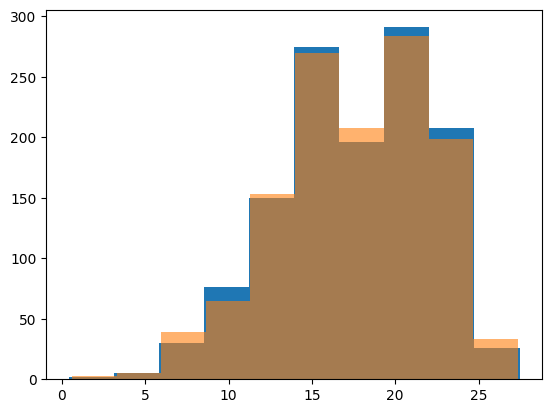

In [52]:
plt.hist(datos["velocidad_gps-ms"])
plt.hist(datos["velocidad"],alpha=0.6)
plt.show()

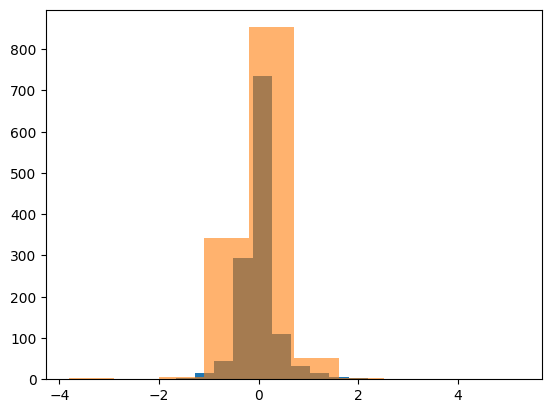

In [53]:
plt.hist(datos["aceleracion_gps"])
plt.hist(datos["aceleracion_ms"],alpha=0.6)
#plt.hist(datos["distance"])
plt.show()


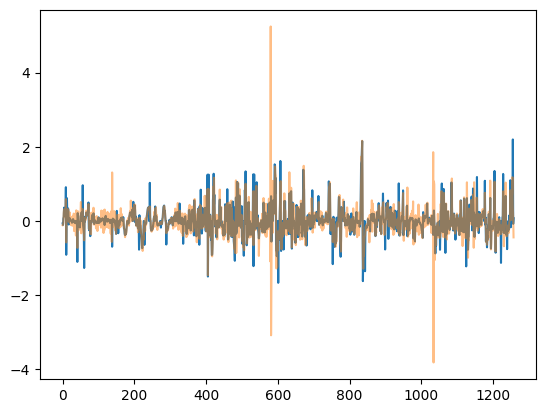

In [54]:
plt.plot(datos["aceleracion_gps"])
plt.plot(datos["aceleracion_ms"],alpha=0.5)
plt.show()
#datos.reset_index(drop=True, inplace=True)
#datos[datos['velocidad']>50]

#pd.options.display.precision = 10
#df = datos[["date","timestamp","ds","velocidad","velocidad_gps", "distance","utm_x","utm_y","slope"]]
#df.iloc[600:615,]


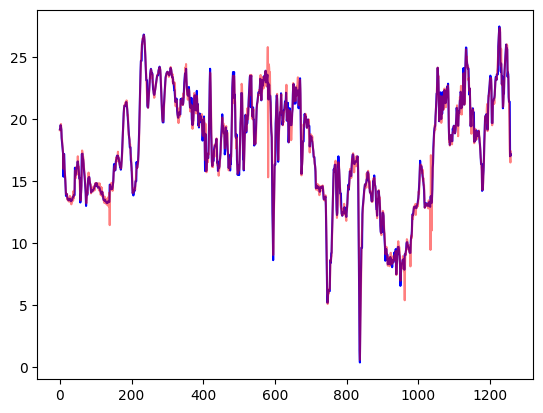

In [55]:
plt.plot(datos["velocidad_gps-ms"],'b-')
plt.plot(datos["velocidad"],'r-',alpha=0.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83c66dfd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83c66dd8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83c66dc730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83c66df430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f83c66def50>],
 'means': []}

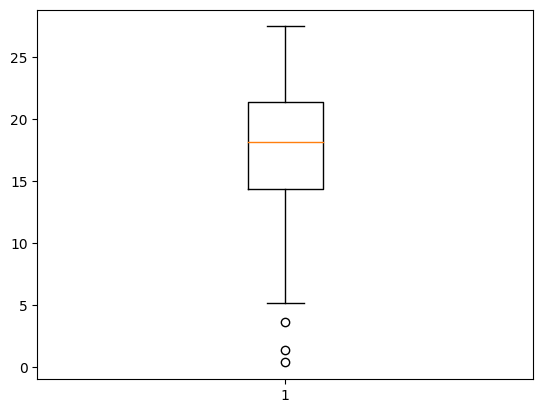

In [56]:
plt.boxplot(datos['velocidad_gps-ms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83ccb56140>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83ccc0d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83c66ded70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83c6744100>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f83c67443a0>],
 'means': []}

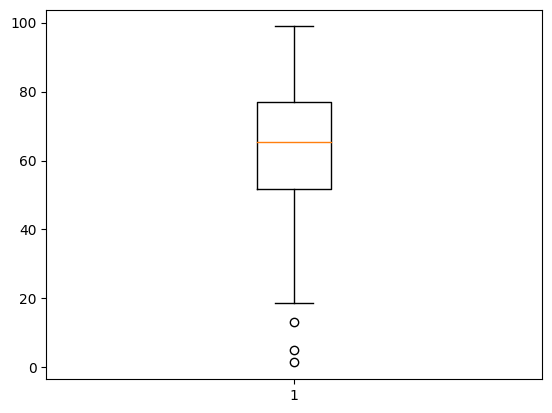

In [57]:
plt.boxplot(datos['velocidad_gps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f83c6794c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83c6795180>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83c67949a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f83c6795600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f83c67958a0>],
 'means': []}

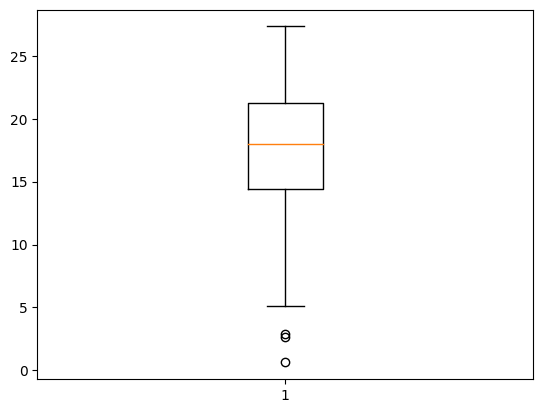

In [58]:
plt.boxplot(datos['velocidad'])

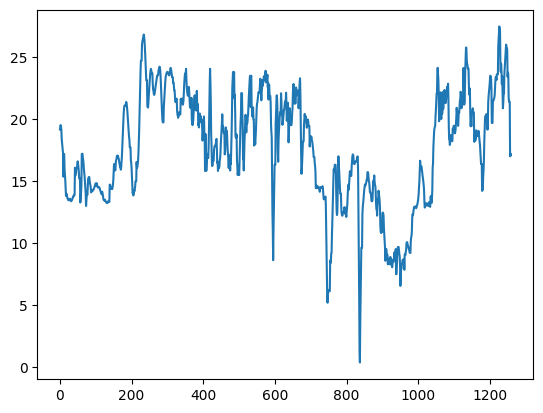

In [59]:
plt.plot(datos['velocidad_gps-ms'])

(array([  3.,   5.,  39.,  65., 153., 270., 208., 284., 199.,  33.]),
 array([ 0.61322875,  3.28684525,  5.96046174,  8.63407823, 11.30769473,
        13.98131122, 16.65492772, 19.32854421, 22.00216071, 24.6757772 ,
        27.3493937 ]),
 <BarContainer object of 10 artists>)

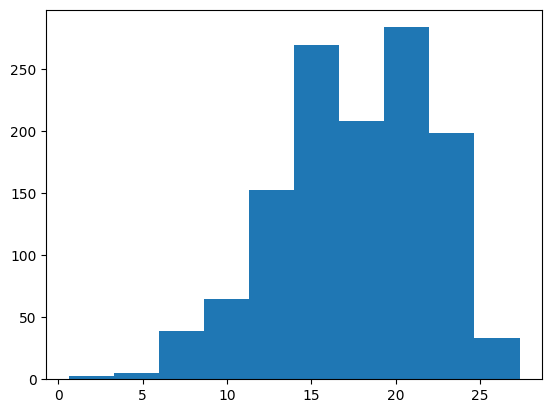

In [60]:
plt.hist(datos['velocidad'])

In [61]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5, rend_motor = 0.30, rend_trans = 0.9, LHV = 432000, densidad_diesel = 840 ):
    
    '''LHV en J/L = (43200 kJ/kg) x (1000 J/kJ) ÷ (0,84 kg/L) = 51428571.43 J/L '''
    
    Fd = (0.5) * densidad_aire * cd * area_front * (datos["velocidad"] ** 2)
    Rx = fr * masa * g * np.cos(np.degrees(np.arctan(datos['slope'])))
    Rg = masa * g *np.sin(np.degrees(np.arctan(datos['slope'])))
    Ri = masa * datos['aceleracion_ms']
    
    datos['fd'] = Fd
    datos['Rx'] = Rx
    datos['Rg'] = Rg
    datos['Ri'] = Ri

    fx = Fd + Rx + Rg + Ri
    
    datos['fx'] = fx

    potencia_rueda = fx * datos["velocidad"]
    
    datos['potencia_rueda'] = potencia_rueda

    potencia_motor = potencia_rueda / (rend_motor * rend_trans)
    
    datos['potencia_motor'] = potencia_motor

    caudal_inst = potencia_motor / (LHV * densidad_diesel )

    datos['caudal_inst'] = caudal_inst * 3600

    return datos

In [72]:
datos_energia = est_energia(datos)
datos_energia

,date,height,old_height,utm_x,utm_y,distance,slope,sum_distance,velocidad,ds,...,aceleracion_gps,aceleracion_ms,fd,Rx,Rg,Ri,fx,potencia_rueda,potencia_motor,caudal_inst
0,12:08:57,2350.300000,2350.3,703261.188589,9.615214e+06,38.199941,0.000000,425.908277,19.099971,2,...,-0.065278,-0.113999,278.455608,249.704000,0.000000,-363.087783,165.071825,3152.867011,1.167729e+04,0.115846
1,12:08:59,2350.300000,2350.3,703250.892573,9.615177e+06,38.655939,0.000000,464.564216,19.327969,2,...,-0.105556,-0.099461,285.143201,249.704000,0.000000,-316.783567,218.063634,4214.727225,1.561010e+04,0.154862
2,12:09:01,2350.300000,2350.3,703240.706827,9.615139e+06,39.053783,0.000000,503.617999,19.526891,2,...,0.072222,-0.041211,291.042755,249.704000,0.000000,-131.258622,409.488133,7996.030325,2.961493e+04,0.293799
3,12:09:03,2350.300000,2350.3,703229.521147,9.615102e+06,39.218629,0.000000,542.836628,19.609314,2,...,0.108333,0.223897,293.504923,249.704000,0.000000,713.113223,1256.322146,24635.615999,9.124302e+04,0.905189
4,12:09:05,2350.300000,2350.3,703220.114369,9.615064e+06,38.323039,0.000000,581.159667,19.161520,2,...,0.359722,0.315135,280.253126,249.704000,0.000000,1003.706358,1533.663484,29387.322972,1.088419e+05,1.079781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,12:57:09,2787.703857,2766.1,691866.980302,9.590112e+06,39.820619,-1.235541,48905.813213,19.910310,2,...,0.000000,1.179885,302.584442,182.855610,-21255.849686,3757.932634,-17012.477000,-338723.683975,-1.254532e+06,-12.445756
1255,12:57:11,2781.657336,2763.3,691869.694220,9.590072e+06,35.101081,-0.079770,48953.762052,17.550540,2,...,2.198611,0.355056,235.110242,-37.706241,30855.086448,1130.854527,32183.344977,564835.092236,2.091982e+06,20.753788
1256,12:57:14,2775.610815,2763.3,691872.408138,9.590032e+06,50.521283,0.000000,49001.710891,16.840428,3,...,-0.076852,0.111533,216.469540,249.704000,0.000000,355.231506,821.405046,13832.812160,5.123264e+04,0.508260
1257,12:57:16,2769.564294,2763.3,691875.122057,9.589991e+06,33.011659,0.000000,49049.659730,16.505830,2,...,0.075000,-0.441382,207.953044,249.704000,0.000000,-1405.800505,-948.143461,-15649.894385,-5.796257e+04,-0.575026


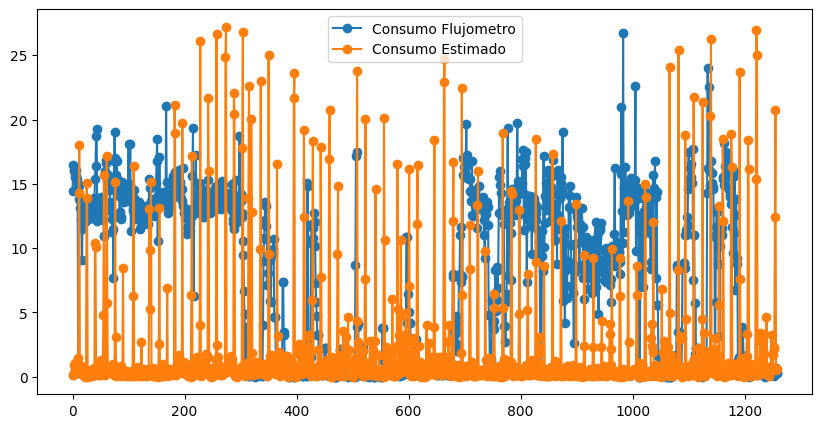

In [73]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia['consumo_inst'], '-o',label='Consumo Flujometro')
plt.plot(np.abs(datos_energia['caudal_inst']),'-o',label='Consumo Estimado')




plt.legend()
plt.show()

In [9]:
datos_energia.columns

Index(['latitude', 'longitude', 'height', 'distance', 'sum_distance', 'slope',
       'date', 'utm_x', 'utm_y', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'timestamp', 'ds', 'velocidad', 'velocidad_gps-ms',
       'next_vel', 'velocidad_ms', 'next_vel_ms', 'aceleracion_gps',
       'aceleracion_ms', 'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda',
       'potencia_motor', 'caudal_inst'],
      dtype='object')

In [65]:
datos_energia_pos = datos_energia.loc[datos_energia['caudal_inst'] > 0]
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
consumo_total_estimado = datos_energia_pos['caudal_inst'].sum()
consumo_total_estimado

/tmp/ipykernel_6006/938077076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_6006/938077076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_energia_pos.dropna(inplace=True)


1521.8770264906861

In [66]:
consumo_total_estimado

1521.8770264906861

In [67]:
consumo_total_flujometro  = len(datos_energia.consumo_total) - datos_energia.consumo_total[0]
consumo_total_flujometro

-1833.0300000000002

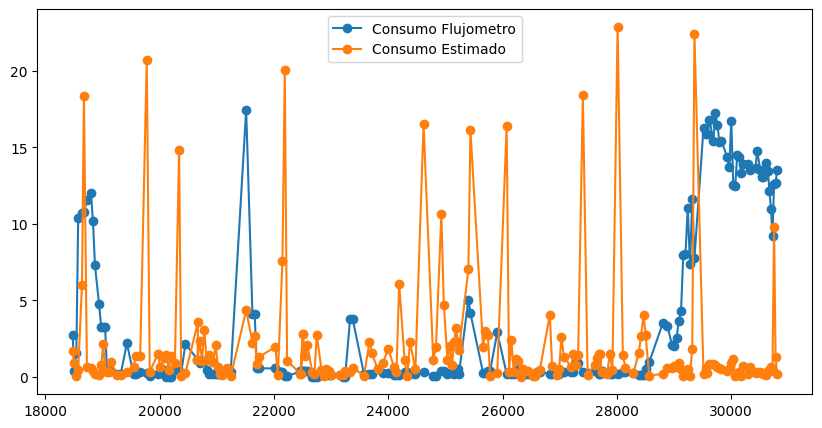

In [71]:

plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['sum_distance'][300:500], datos_energia_pos['consumo_inst'][300:500], '-o',label='Consumo Flujometro')

plt.plot(datos_energia_pos['sum_distance'][300:500], datos_energia_pos['caudal_inst'][300:500],'-o',label='Consumo Estimado')



plt.legend()
plt.show()

In [44]:
datos_energia_pos.keys()

Index(['date', 'height', 'old_height', 'utm_x', 'utm_y', 'distance', 'slope',
       'sum_distance', 'velocidad', 'ds', 'velocidad_gps', 'consumo_total',
       'consumo_inst', 'latitud', 'longitud', 'velocidad_gps-ms', 'next_vel',
       'velocidad_ms', 'next_vel_ms', 'aceleracion_gps', 'aceleracion_ms',
       'fd', 'Rx', 'Rg', 'Ri', 'fx', 'potencia_rueda', 'potencia_motor',
       'caudal_inst'],
      dtype='object')

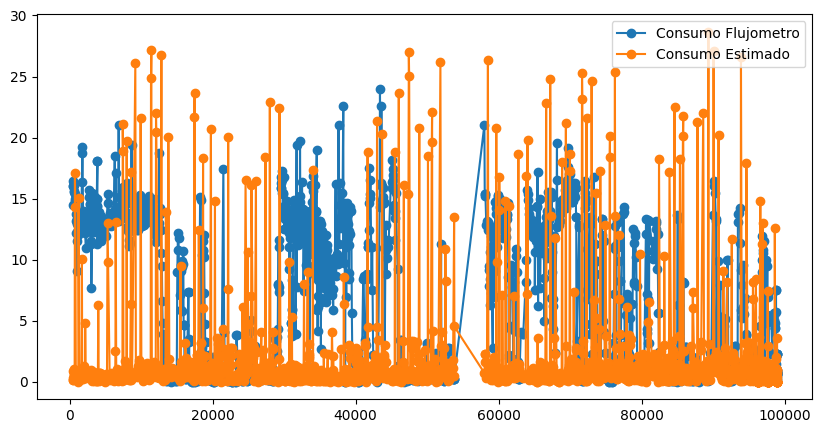

In [48]:
plt.figure(figsize=(10,5))
plt.plot(datos_energia_pos['sum_distance'], datos_energia_pos['consumo_inst'], '-o',label='Consumo Flujometro')
plt.plot(datos_energia_pos['sum_distance'], datos_energia_pos['caudal_inst'],'-o',label='Consumo Estimado')



plt.legend()
plt.show()

In [47]:
datos_energia.to_csv('consumo_estimado_corregido_aceleracion.csv', index=False)